Exercise: Monthly Retail Sales Analysis
1. Create a CSV of Sales Data
Use the following data:

In [3]:
import pandas as pd

data = """Month,Store,Sales
Jan,Store A,12000
Jan,Store B,15000
Feb,Store A,18000
Feb,Store B,17000
Mar,Store A,16000
Mar,Store B,19000
"""

with open('sales_data.csv','w') as file:
  file.write(data)

df = pd.read_csv('sales_data.csv')
print(df)

  Month    Store  Sales
0   Jan  Store A  12000
1   Jan  Store B  15000
2   Feb  Store A  18000
3   Feb  Store B  17000
4   Mar  Store A  16000
5   Mar  Store B  19000


2. Total Sales Per Store
Group the data by Store and calculate total sales for each store.
Identify which store had higher total sales.

In [10]:
tot = df.groupby('Store')['Sales'].sum().reset_index()
print("\nTotal Sales Per Store:\n", tot)

top = tot.loc[tot['Sales'].idxmax()]
print(f"\nStore with highest total sales: {top['Store']} ({top['Sales']})")



Total Sales Per Store:
      Store  Sales
0  Store A  46000
1  Store B  51000

Store with highest total sales: Store B (51000)


3. Monthly Sales Trend
Group the data by Month and sum up the total sales (Store A + Store B).
Print the result.

In [11]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print("Total sales by each month: \n",monthly_sales)

Total sales by each month: 
   Month  Sales
0   Feb  35000
1   Jan  27000
2   Mar  35000


4. Chart: Monthly Sales by Store
Create a line chart showing monthly sales for both Store A and Store B.
X-axis: Month
Y-axis: Sales
Two lines: Store A and Store B

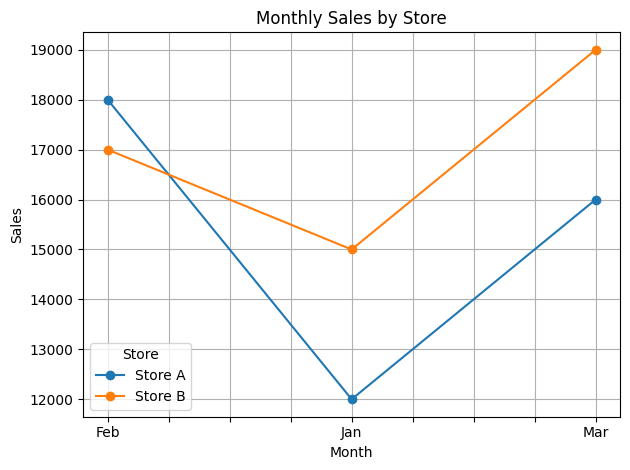

In [13]:
import matplotlib.pyplot as plt

pivot_data = df.pivot(index='Month', columns='Store', values='Sales')
pivot_data.plot(kind='line', marker='o')
plt.title('Monthly Sales by Store')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Store')
plt.tight_layout()
plt.show()

5. Bonus
Create a bar chart showing total sales per store.
Add data labels on top of each bar.
Save this chart as an image ( sales_chart.png ).

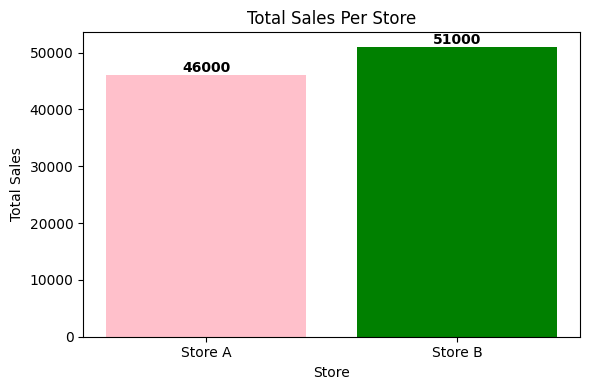

In [15]:
plt.figure(figsize=(6,4))
plt.bar(total_sales['Store'], total_sales['Sales'], color=['pink', 'green'])

for i, val in enumerate(total_sales['Sales']):
    plt.text(i, val + 500, str(val), ha='center', fontweight='bold')

plt.title('Total Sales Per Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.tight_layout()

plt.savefig('sales_chart.png')
plt.show()
